In [3]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [4]:
X , Y = load_planar_dataset()

#### Dataset
X is a numpy array containing features (x1, x2)  
Y contains labels (red:0, blue:1)

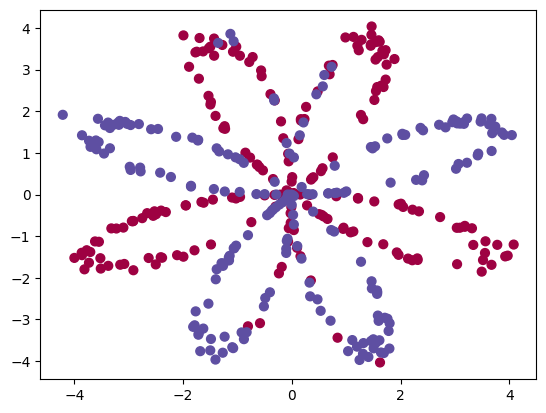

In [5]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
shape_X = X.shape
shape_Y= Y.shape
m = Y.shape[1]    #no. of training examples

### Simple Logistic Regression 

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\isthi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


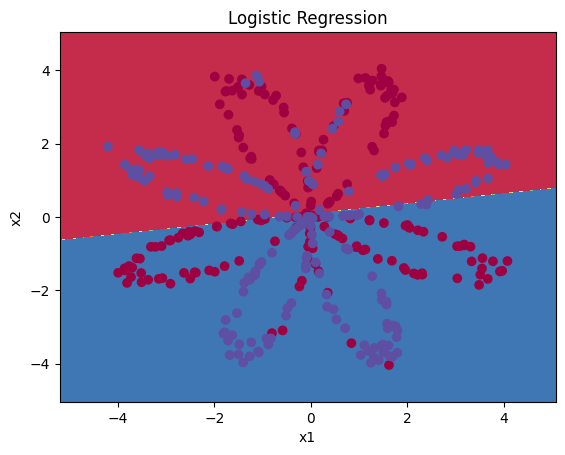

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [9]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return n_x , n_h , n_y

In [10]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y,1))

    parameters = { 'W1': W1,
                   'b1':b1,
                   'W2':W2,
                   'b2':b2 }
    
    return parameters

In [11]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)
    A2 = sigmoid(Z2)

    cache = { 'Z1': Z1,
              'A1': A1,
              'Z2': Z2,
              'A2': A2}
    
    return A2, cache

In [16]:
def compute_cost(A2, Y):

    m = Y.shape[1]

    logprobs = np.multiply(Y,np.log(A2)) + np.multiply((1-Y), np.log(1 - A2))
    cost = (-1/m)*np.sum(logprobs)

    cost = float(np.squeeze(cost)) #To make sure cost is of the dimension we need which is dimension 0 . for ex we want 14 and not [[14]]

    return cost 

In [17]:
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
  
    W1 = parameters['W1']
    W2 = parameters['W2']
  
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 -Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims = True)
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)* (np.dot(dZ1,X.T))
    db1 = (1/m)* np.sum(dZ1, axis = 1, keepdims = True)                        

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [18]:
def update_parameters(parameters, grads, learning_rate = 1.2):
  
    W1 = parameters['W1'] 
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [21]:
def nn_model(X, Y , n_h , num_iterations = 1000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X , parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache , X, Y)
        parameters = update_parameters(parameters , grads)
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters        

In [22]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)
    
    return predictions

## Planar Dataset testing 

Cost after iteration 0: 0.770532
Cost after iteration 1000: 0.262800
Cost after iteration 2000: 0.248999
Cost after iteration 3000: 0.242101
Cost after iteration 4000: 0.237480
Cost after iteration 5000: 0.234117
Cost after iteration 6000: 0.231634
Cost after iteration 7000: 0.229779
Cost after iteration 8000: 0.228371
Cost after iteration 9000: 0.227280


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

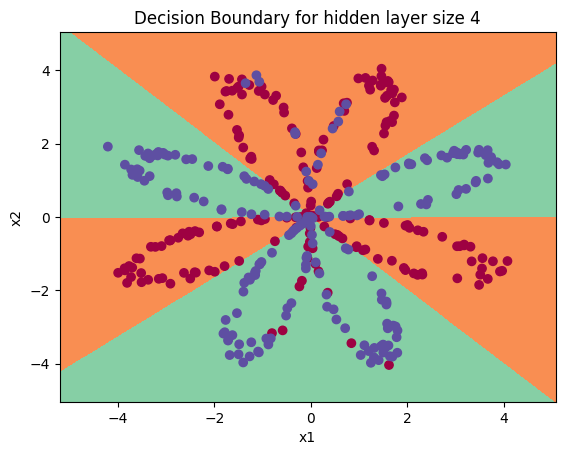

In [23]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%


## Tuning hidden layer size

Accuracy for 1 hidden units: 66.0 %
Accuracy for 2 hidden units: 64.75 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.75 %
Accuracy for 5 hidden units: 91.5 %


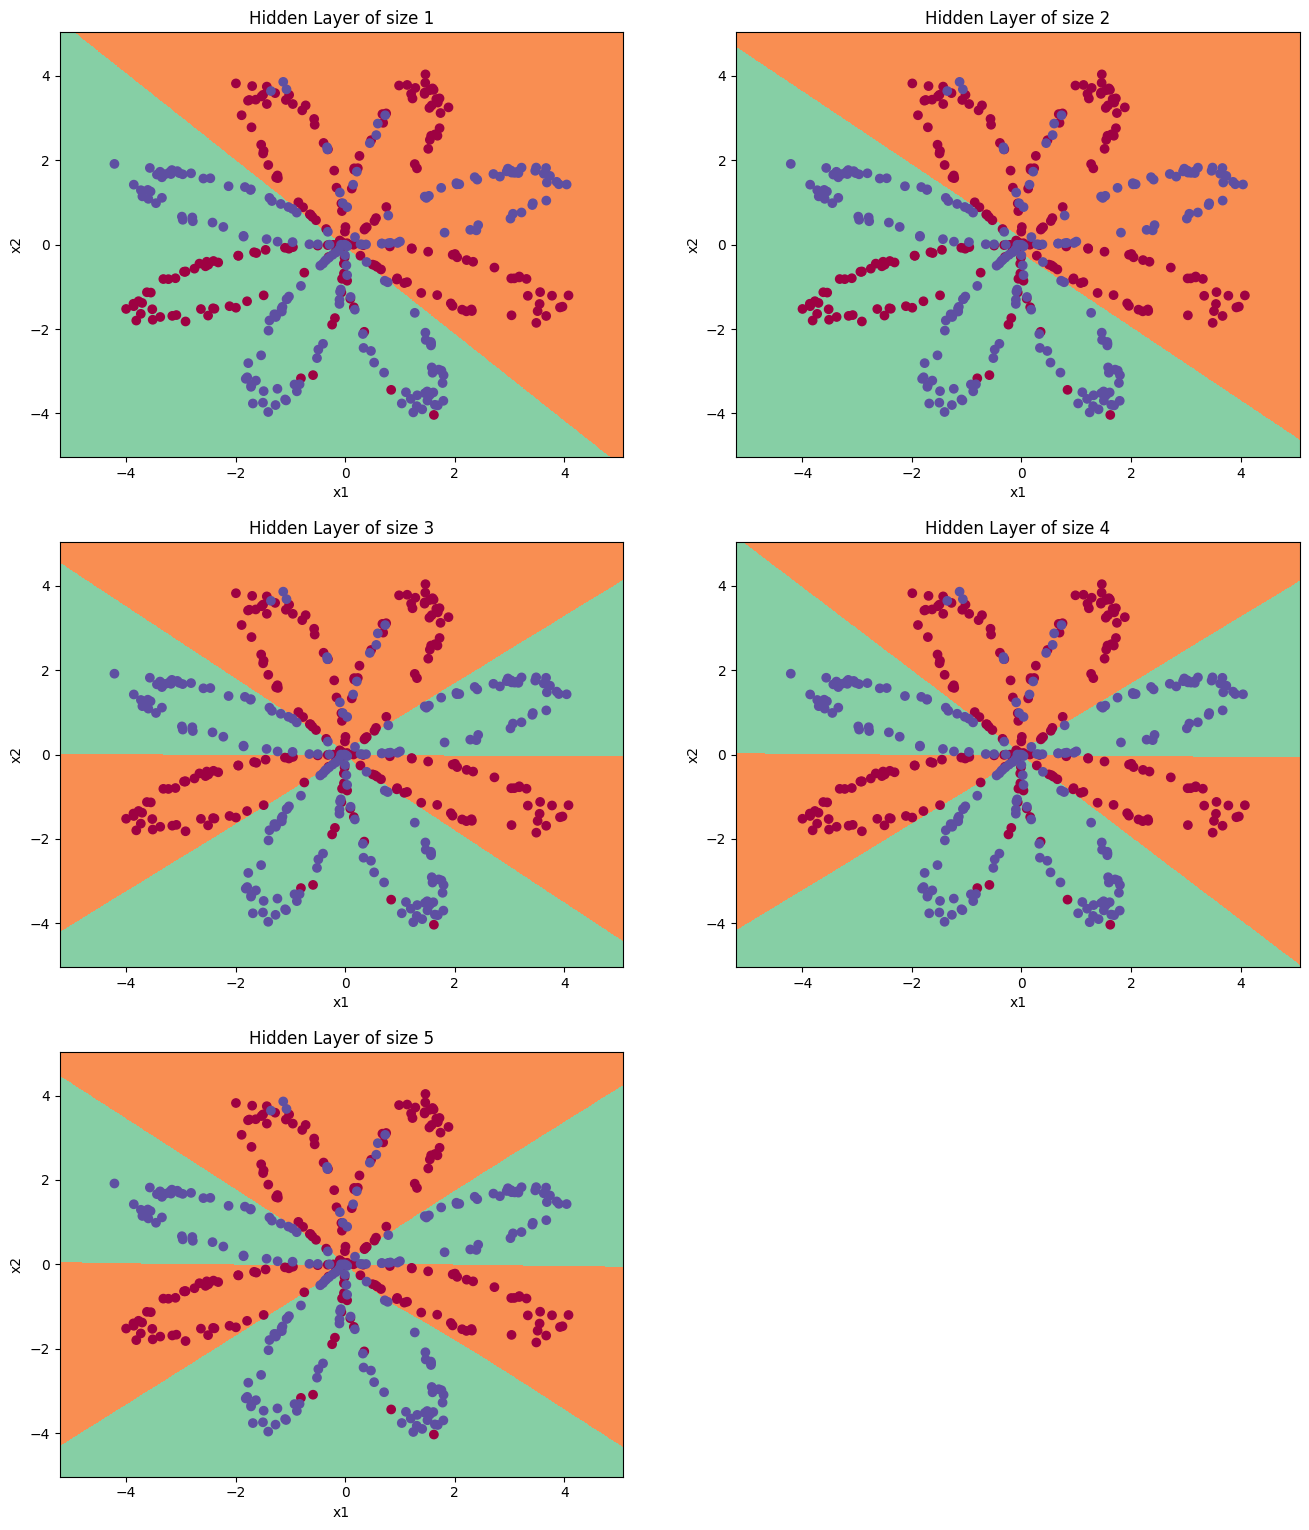

In [25]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]



for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))